In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load dataset
df = pd.read_excel(r'part6\Historical Weather Data 2010-2021.xlsx', sheet_name='201021')
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,45,6.91,7.18,1709.0,NO,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,45,6.77,7.66,1707.0,YES,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,41,6.76,7.44,1707.0,NO,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,43,7.10,7.43,1708.0,NO,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,44,6.53,8.05,1709.0,NO,NaN,NaN,NaN,NaN,NaN


In [3]:
# list of columns
print(list(df.columns))

['observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']


In [4]:
# dataframe raw information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   observation                               4227 non-null   datetime64[ns]
 1   tempC_7to8                                4227 non-null   int64         
 2   tempC_1to2                                4227 non-null   int64         
 3   tempC_6to7                                4227 non-null   int64         
 4   tempC_avg(0C)                             4227 non-null   int64         
 5   Relative humidity_7to8                    4227 non-null   int64         
 6   Relative humidity_1to2                    4227 non-null   int64         
 7   Relative humidity_6to7                    4227 non-null   int64         
 8   Relative humidity_avg(%)                  4227 non-null   int64         
 9   windspeedKmph_7to8            

# Observation:
- null values with columns :- 

> 30  Type of Disease (Bacterial Blight/Telya)  1174 non-null   object        
> 31  Anthracnose                               676 non-null    object        
> 32  Fruit Spot/ Rot                           464 non-null    object        
> 33  Fusarium Wilt                             103 non-null    object        
> 34  Fruit Borer / Blight Blora                787 non-null    object

- categorical columns :- 

> 21  weatherDesc_7to8                          4227 non-null   object        
> 22  weatherDesc_1to2                          4227 non-null   object        
> 23  weatherDesc_6to7                          4227 non-null   object
> 29  Label (Disease Yes/No)                    4227 non-null   object        
> 30  Type of Disease (Bacterial Blight/Telya)  1174 non-null   object        
> 31  Anthracnose                               676 non-null    object        
> 32  Fruit Spot/ Rot                           464 non-null    object        
> 33  Fusarium Wilt                             103 non-null    object        
> 34  Fruit Borer / Blight Blora                787 non-null    object 


In [15]:
# to check only data type of columns
df.dtypes

observation                                 datetime64[ns]
tempC_7to8                                           int64
tempC_1to2                                           int64
tempC_6to7                                           int64
tempC_avg(0C)                                        int64
Relative humidity_7to8                               int64
Relative humidity_1to2                               int64
Relative humidity_6to7                               int64
Relative humidity_avg(%)                             int64
windspeedKmph_7to8                                   int64
windspeedKmph_1to2                                   int64
windspeedKmph_6to7                                   int64
windspeedKmph_avg(Km/h)                              int64
pressureMB_7to8                                      int64
pressureMB_1to2                                      int64
pressureMB_6to7                                      int64
pressureMB_avg                                       int

In [5]:
df['Label (Disease Yes/No)'].unique()

array(['NO', 'YES', 'yes', 'Yes'], dtype=object)

In [6]:
df['Label (Disease Yes/No)'].value_counts()

NO     2470
YES    1746
yes      10
Yes       1
Name: Label (Disease Yes/No), dtype: int64

In [7]:
df['Label (Disease Yes/No)'] = np.where(df['Label (Disease Yes/No)'] == 'NO',0,1)
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,45,6.91,7.18,1709.0,0,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,45,6.77,7.66,1707.0,1,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,41,6.76,7.44,1707.0,0,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,43,7.10,7.43,1708.0,0,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,44,6.53,8.05,1709.0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Label (Disease Yes/No)'].unique()

array([0, 1])

In [9]:
df['Label (Disease Yes/No)'].value_counts()

0    2470
1    1757
Name: Label (Disease Yes/No), dtype: int64

# Observation:
- categorical variables converted to number.
- **Dummy Coding:** Dummy coding is a commonly used method for converting a categorical input variable into continuous variable. ‘Dummy’, as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0. For every level present, one dummy variable will be created.

In [10]:
df.describe()

,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,...,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No)
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,...,4227.000000,4227.000000,4227.000000,4227.000000,4227.00000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000
mean,25.442631,30.345635,24.677313,26.489236,54.340194,41.961675,57.377573,50.893542,10.160161,12.697894,...,0.049799,0.125905,0.210054,0.128586,8.29392,45.418737,7.029707,7.482685,1703.469375,0.415661
std,3.707631,4.409258,3.797272,3.558857,23.713679,25.747177,25.953148,24.644506,5.859423,7.132430,...,0.290008,0.342865,0.787239,0.376221,2.61489,10.338850,0.256483,0.500309,19.377816,0.492894
min,12.000000,17.000000,15.000000,17.000000,6.000000,4.000000,8.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.80000,30.000000,6.500000,6.500000,1624.500000,0.000000
25%,23.000000,27.000000,22.000000,24.000000,34.000000,19.000000,34.000000,29.000000,6.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,5.40000,35.000000,6.850000,7.120000,1707.000000,0.000000
50%,25.000000,29.000000,24.000000,26.000000,51.000000,33.000000,52.000000,45.000000,9.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,9.60000,44.000000,7.040000,7.500000,1708.000000,0.000000
75%,28.000000,33.000000,27.000000,29.000000,78.000000,67.000000,85.500000,77.000000,13.000000,17.000000,...,0.000000,0.100000,0.100000,0.100000,10.40000,52.000000,7.200000,7.800000,1709.000000,1.000000
max,36.000000,42.000000,39.000000,37.000000,98.000000,98.000000,99.000000,98.000000,42.000000,41.000000,...,10.200000,7.000000,22.000000,8.300000,11.20000,85.000000,7.500000,8.500000,1710.000000,1.000000


# Find null values

In [11]:
df.isnull().sum()

observation                                    0
tempC_7to8                                     0
tempC_1to2                                     0
tempC_6to7                                     0
tempC_avg(0C)                                  0
Relative humidity_7to8                         0
Relative humidity_1to2                         0
Relative humidity_6to7                         0
Relative humidity_avg(%)                       0
windspeedKmph_7to8                             0
windspeedKmph_1to2                             0
windspeedKmph_6to7                             0
windspeedKmph_avg(Km/h)                        0
pressureMB_7to8                                0
pressureMB_1to2                                0
pressureMB_6to7                                0
pressureMB_avg                                 0
precipMM_7to8                                  0
precipMM_1to2                                  0
precipMM_6to7                                  0
precipMM_avg(mm)    

<AxesSubplot:>

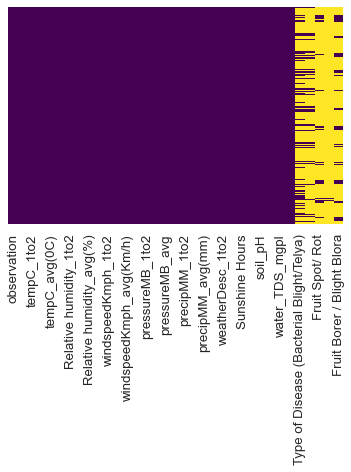

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['Type of Disease (Bacterial Blight/Telya)',
 'Anthracnose',
 'Fruit Spot/ Rot',
 'Fusarium Wilt',
 'Fruit Borer / Blight Blora']

# Observation:

- ['Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora'] have null values.

- the columns / features all are dependent variable and null value is easily fill by 0.


# Convert or preprocess on the categorical variable (data type == object)

# Convert the following columns:
- weatherDesc_7to8, weatherDesc_1to2, weatherDesc_6to7
- priority: Heavy Rainfall (1), Moderate rainfall (2), less or irregular or patchy rainfall(3), cloudy weather (4) and sunny or clear weather (5-No disease)

- priority: ` Heavy Rainfall (1), Moderate rainfall (2), less or irregular or patchy rainfall(3), cloudy weather (4) and sunny or clear weather (5-No disease), 'Clear (5)', 'Cloudy(4) ', 'Fog (5)', 'Heavy rain (1)', 'Heavy rain at times (5)', 'Light drizzle (3)', 'Light rain(3)', 'Light rain shower(3)', 'Mist (3)', 'Moderate or heavy rain shower (1)', 'Moderate rain (2)', 'Moderate rain at times (2)', 'Overcast(3)', 'Partly cloudy(4)', 'Patchy light drizzle(3)', 'Patchy light rain(3)', 'Patchy light rain with thunder(3)', 'Patchy rain possible(3)', 'Sunny(5)', 'Thundery outbreaks possible(2)', 'Torrential rain shower (2)' `

- 'Clear', 'Cloudy', 'Fog', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Light rain', 'Light rain shower', 'Mist', 'Moderate or heavy rain shower', 'Moderate rain', 'Moderate rain at times', 'Overcast', 'Partly cloudy', 'Patchy light drizzle', 'Patchy light rain', 'Patchy light rain with thunder', 'Patchy rain possible', 'Sunny', 'Thundery outbreaks possible', 'Torrential rain shower'


In [16]:
df['weatherDesc_7to8'].unique(), len(df['weatherDesc_7to8'].unique())

(array(['Clear', 'Partly cloudy', 'Patchy light drizzle',
        'Patchy light rain with thunder', 'Patchy rain possible',
        'Light rain shower', 'Moderate or heavy rain shower', 'Cloudy',
        'Moderate rain', 'Light drizzle', 'Overcast', 'Light rain', 'Mist',
        'Torrential rain shower', 'Heavy rain', 'Patchy light rain',
        'Moderate rain at times', 'Heavy rain at times', 'Sunny',
        'Thundery outbreaks possible', 'Fog'], dtype=object),
 21)

In [17]:
df['weatherDesc_7to8'].value_counts()

Clear                             1895
Partly cloudy                      710
Sunny                              582
Light rain shower                  278
Cloudy                             228
Light drizzle                      139
Patchy rain possible               110
Light rain                          68
Overcast                            55
Moderate rain                       42
Patchy light drizzle                38
Moderate or heavy rain shower       28
Mist                                17
Moderate rain at times              10
Heavy rain                           9
Patchy light rain                    7
Fog                                  4
Patchy light rain with thunder       2
Torrential rain shower               2
Heavy rain at times                  2
Thundery outbreaks possible          1
Name: weatherDesc_7to8, dtype: int64

In [18]:
df['weatherDesc_1to2'].unique(), len(df['weatherDesc_1to2'].unique())

(array(['Sunny', 'Partly cloudy', 'Patchy rain possible',
        'Thundery outbreaks possible', 'Light rain shower',
        'Patchy light rain with thunder', 'Moderate or heavy rain shower',
        'Moderate rain', 'Moderate rain at times', 'Patchy light drizzle',
        'Heavy rain', 'Light drizzle', 'Light rain', 'Patchy light rain',
        'Torrential rain shower', 'Cloudy', 'Overcast',
        'Heavy rain at times'], dtype=object),
 18)

In [19]:
df['weatherDesc_1to2'].value_counts()

Sunny                             2215
Light rain shower                  620
Partly cloudy                      519
Patchy rain possible               417
Moderate or heavy rain shower      214
Light rain                          56
Moderate rain                       49
Cloudy                              20
Light drizzle                       20
Heavy rain                          17
Heavy rain at times                 13
Torrential rain shower              11
Patchy light drizzle                11
Patchy light rain                   10
Overcast                            10
Thundery outbreaks possible          9
Moderate rain at times               8
Patchy light rain with thunder       8
Name: weatherDesc_1to2, dtype: int64

In [20]:
df['weatherDesc_6to7'].unique(), len(df['weatherDesc_6to7'].unique())

(array(['Sunny', 'Partly cloudy', 'Patchy rain possible',
        'Patchy light rain with thunder', 'Overcast', 'Light rain',
        'Moderate rain', 'Heavy rain', 'Patchy light rain',
        'Light rain shower', 'Moderate rain at times', 'Cloudy',
        'Moderate or heavy rain shower', 'Patchy light drizzle', 'Mist',
        'Light drizzle', 'Fog', 'Torrential rain shower',
        'Heavy rain at times', 'Clear'], dtype=object),
 20)

In [21]:
df['weatherDesc_6to7'].value_counts()

Sunny                             1743
Clear                              552
Partly cloudy                      511
Light rain shower                  408
Patchy rain possible               335
Cloudy                             119
Light drizzle                      109
Moderate or heavy rain shower      104
Light rain                          89
Mist                                68
Moderate rain                       38
Overcast                            38
Patchy light drizzle                26
Heavy rain                          19
Torrential rain shower              18
Moderate rain at times              17
Patchy light rain                   11
Patchy light rain with thunder      11
Fog                                  6
Heavy rain at times                  5
Name: weatherDesc_6to7, dtype: int64

In [22]:
weatherDesc = list(set(list(df['weatherDesc_7to8'].unique()) + list(df['weatherDesc_1to2'].unique()) + list(df['weatherDesc_6to7'].unique())))
weatherDesc.sort()
print(weatherDesc, len(weatherDesc))

['Clear', 'Cloudy', 'Fog', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Light rain', 'Light rain shower', 'Mist', 'Moderate or heavy rain shower', 'Moderate rain', 'Moderate rain at times', 'Overcast', 'Partly cloudy', 'Patchy light drizzle', 'Patchy light rain', 'Patchy light rain with thunder', 'Patchy rain possible', 'Sunny', 'Thundery outbreaks possible', 'Torrential rain shower'] 21


# Observation : 

- As the values and prioritys are give, so Convert the categorical variable using `replacing values` method.

> df['col'].replace(['a', 'b'], [0, 1], inplace=True)

In [29]:
keys = ['Clear', 'Cloudy', 'Fog', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Light rain', 'Light rain shower', 
        'Mist', 'Moderate or heavy rain shower', 'Moderate rain', 'Moderate rain at times', 'Overcast', 'Partly cloudy', 
        'Patchy light drizzle', 'Patchy light rain', 'Patchy light rain with thunder', 'Patchy rain possible', 'Sunny', 
        'Thundery outbreaks possible', 'Torrential rain shower'] 
vals = [5,4,5,1,5,3,3,3,3,1,2,2,3,4,3,3,3,3,5,2,2]

df['weatherDesc_7to8'].replace(keys, vals, inplace=True)
df['weatherDesc_1to2'].replace(keys, vals, inplace=True)
df['weatherDesc_6to7'].replace(keys, vals, inplace=True)

In [59]:
priority_dict = {keys[i]:vals[i] for i in range(len(keys))}
priority_dict

{'Clear': 5,
 'Cloudy': 4,
 'Fog': 5,
 'Heavy rain': 1,
 'Heavy rain at times': 5,
 'Light drizzle': 3,
 'Light rain': 3,
 'Light rain shower': 3,
 'Mist': 3,
 'Moderate or heavy rain shower': 1,
 'Moderate rain': 2,
 'Moderate rain at times': 2,
 'Overcast': 3,
 'Partly cloudy': 4,
 'Patchy light drizzle': 3,
 'Patchy light rain': 3,
 'Patchy light rain with thunder': 3,
 'Patchy rain possible': 3,
 'Sunny': 5,
 'Thundery outbreaks possible': 2,
 'Torrential rain shower': 2}

In [38]:
df.iloc[:,21:24]

,weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7
0,5,5,5
1,5,4,4
2,4,4,4
3,5,5,5
4,5,5,5
...,...,...,...
4222,5,5,5
4223,5,5,5
4224,5,5,5
4225,5,5,3


In [49]:
df['weatherDesc'] = [min(df['weatherDesc_7to8'][i],df['weatherDesc_1to2'][i],df['weatherDesc_6to7'][i]) for i in range(len(df))]

In [53]:
# Rearrange columns in any way you want.

columns = ['observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7',
       'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2',
       'Relative humidity_6to7', 'Relative humidity_avg(%)',
       'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7',
       'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2',
       'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2',
       'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8',
       'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Sunshine Hours',
       '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl',
       'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)',
       'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt',
       'Fruit Borer / Blight Blora']
df = df[columns]
df.iloc[:,21:]

,weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,5,5,5,5,9.8,45,6.91,7.18,1709.0,0,NaN,NaN,NaN,NaN,NaN
1,5,4,4,4,9.8,45,6.77,7.66,1707.0,1,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,4,4,4,4,9.8,41,6.76,7.44,1707.0,0,NaN,NaN,NaN,NaN,NaN
3,5,5,5,5,9.8,43,7.10,7.43,1708.0,0,NaN,NaN,NaN,NaN,NaN
4,5,5,5,5,9.8,44,6.53,8.05,1709.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,5,5,5,5,9.7,41,7.17,7.69,1707.0,1,Bacterial Blight,NaN,NaN,NaN,NaN
4223,5,5,5,5,9.7,42,7.46,8.22,1709.0,1,Bacterial Blight,NaN,NaN,NaN,NaN
4224,5,5,5,5,9.7,44,7.38,7.92,1709.0,0,NaN,NaN,NaN,NaN,NaN
4225,5,5,3,3,9.6,41,7.01,7.16,1630.2,0,NaN,NaN,NaN,NaN,NaN


In [62]:
df['weatherDesc'].value_counts()

5    2029
3    1229
4     527
1     331
2     111
Name: weatherDesc, dtype: int64

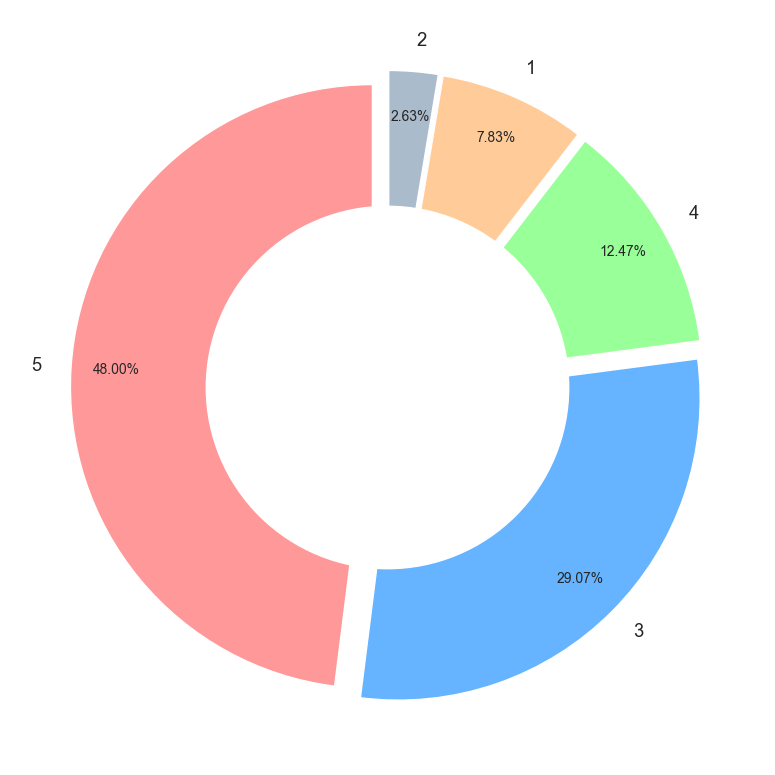

In [95]:
val = df['weatherDesc'].value_counts().values
ind_name = df['weatherDesc'].value_counts().index

# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
# https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#aabbcc']

plt.figure(figsize=(12, 10), dpi=100)
plt.pie(val, labels=ind_name, pctdistance=0.85, colors=colors,
        explode=explode, autopct='%1.2f%%', startangle=90) # , shadow=True

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Observation :

- `48%` time we have `Clear` weather.
- `29.07%` time we have `Light Rain` weather.
- `12.47%` time we have `Cloudy` weather.
- `7.83%` time we have `Heavy Rain` weather.
- `2.63%` time we have `Moderate Rain` weather.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   observation                               4227 non-null   datetime64[ns]
 1   tempC_7to8                                4227 non-null   int64         
 2   tempC_1to2                                4227 non-null   int64         
 3   tempC_6to7                                4227 non-null   int64         
 4   tempC_avg(0C)                             4227 non-null   int64         
 5   Relative humidity_7to8                    4227 non-null   int64         
 6   Relative humidity_1to2                    4227 non-null   int64         
 7   Relative humidity_6to7                    4227 non-null   int64         
 8   Relative humidity_avg(%)                  4227 non-null   int64         
 9   windspeedKmph_7to8            

# Handle Missing Value's

In [101]:
df['Type of Disease (Bacterial Blight/Telya)'].fillna(0, inplace=True)
df['Anthracnose'].fillna(0, inplace=True)
df['Fruit Spot/ Rot'].fillna(0, inplace=True)
df['Fusarium Wilt'].fillna(0, inplace=True)
df['Fruit Borer / Blight Blora'].fillna(0, inplace=True)
df

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,45,6.77,7.66,1707.0,1,Bacterial Blight,Anthracnose,0,0,0
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,44,6.53,8.05,1709.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,2021-11-27,21,32,27,26,56,35,48,46,3,...,41,7.17,7.69,1707.0,1,Bacterial Blight,0,0,0,0
4223,2021-11-28,21,31,26,26,58,32,40,43,7,...,42,7.46,8.22,1709.0,1,Bacterial Blight,0,0,0,0
4224,2021-11-29,17,26,24,22,49,29,38,38,12,...,44,7.38,7.92,1709.0,0,0,0,0,0,0
4225,2021-11-30,17,27,22,22,52,41,64,52,14,...,41,7.01,7.16,1630.2,0,0,0,0,0,0


In [102]:
df['Type of Disease (Bacterial Blight/Telya)'].unique(), len(df['Type of Disease (Bacterial Blight/Telya)'].unique())

(array([0, 'Bacterial Blight', 'Bacterial Blight (Telya)'], dtype=object), 3)

In [103]:
df['Type of Disease (Bacterial Blight/Telya)'].value_counts()

0                           3053
Bacterial Blight             875
Bacterial Blight (Telya)     299
Name: Type of Disease (Bacterial Blight/Telya), dtype: int64

In [104]:
df['Type of Disease (Bacterial Blight/Telya)'] = np.where(df['Type of Disease (Bacterial Blight/Telya)'] == 0,0,1)

In [105]:
df['Anthracnose'].unique(), len(df['Anthracnose'].unique())

(array([0, 'Anthracnose', 'Anthrocnose', 'Anthocnose', 'Antrocnose'],
       dtype=object),
 5)

In [106]:
df['Anthracnose'].value_counts()

0              3551
Anthrocnose     438
Anthracnose     219
Anthocnose       17
Antrocnose        2
Name: Anthracnose, dtype: int64

In [107]:
df['Anthracnose'] = np.where(df['Anthracnose'] == 0,0,1)

In [109]:
df['Fruit Spot/ Rot'].unique(), len(df['Fruit Spot/ Rot'].unique())

(array([0, 'Fruit Spot/ Rot', 'Fruit Spot /Rot', 'Fruit Spot/Rot',
        'Fruit Spot / Rot', 'Fruit Spot/ rot'], dtype=object),
 6)

In [110]:
df['Fruit Spot/ Rot'].value_counts()

0                   3763
Fruit Spot/ Rot      327
Fruit Spot/ rot       46
Fruit Spot /Rot       40
Fruit Spot / Rot      39
Fruit Spot/Rot        12
Name: Fruit Spot/ Rot, dtype: int64

In [111]:
df['Fruit Spot/ Rot'] = np.where(df['Fruit Spot/ Rot'] == 0,0,1)

In [112]:
df['Fusarium Wilt'].unique(), len(df['Fusarium Wilt'].unique())

(array([0, 'Fusarium Wilt'], dtype=object), 2)

In [113]:
df['Fusarium Wilt'].value_counts()

0                4124
Fusarium Wilt     103
Name: Fusarium Wilt, dtype: int64

In [114]:
df['Fusarium Wilt'] = np.where(df['Fusarium Wilt'] == 0,0,1)

In [115]:
df['Fruit Borer / Blight Blora'].unique(), len(df['Fruit Borer / Blight Blora'].unique())

(array([0, 'Fruit Borer / Blight Blora', 'Blight Blora'], dtype=object), 3)

In [116]:
df['Fruit Borer / Blight Blora'].value_counts()

0                             3440
Fruit Borer / Blight Blora     784
Blight Blora                     3
Name: Fruit Borer / Blight Blora, dtype: int64

In [117]:
df['Fruit Borer / Blight Blora'] = np.where(df['Fruit Borer / Blight Blora'] == 0,0,1)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   observation                               4227 non-null   datetime64[ns]
 1   tempC_7to8                                4227 non-null   int64         
 2   tempC_1to2                                4227 non-null   int64         
 3   tempC_6to7                                4227 non-null   int64         
 4   tempC_avg(0C)                             4227 non-null   int64         
 5   Relative humidity_7to8                    4227 non-null   int64         
 6   Relative humidity_1to2                    4227 non-null   int64         
 7   Relative humidity_6to7                    4227 non-null   int64         
 8   Relative humidity_avg(%)                  4227 non-null   int64         
 9   windspeedKmph_7to8            

# Consider the observation columns and convert it into  date, month, year

In [128]:
int(df['observation'].astype('str').str.split('-')[0][2]), int(df['observation'].astype('str').str.split('-')[0][1]), int(df['observation'].astype('str').str.split('-')[0][0])

(1, 1, 2010)

In [150]:
df['date'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[2]) for i in range(len(df))]
df['month'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[1]) for i in range(len(df))]
df['year'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[0]) for i in range(len(df))]

In [151]:
df

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,date,month,year
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,1709.0,0,0,0,0,0,0,1,1,2010
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,1707.0,1,1,1,0,0,0,2,1,2010
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,1707.0,0,0,0,0,0,0,3,1,2010
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,1708.0,0,0,0,0,0,0,4,1,2010
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,1709.0,0,0,0,0,0,0,5,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,2021-11-27,21,32,27,26,56,35,48,46,3,...,1707.0,1,1,0,0,0,0,27,11,2021
4223,2021-11-28,21,31,26,26,58,32,40,43,7,...,1709.0,1,1,0,0,0,0,28,11,2021
4224,2021-11-29,17,26,24,22,49,29,38,38,12,...,1709.0,0,0,0,0,0,0,29,11,2021
4225,2021-11-30,17,27,22,22,52,41,64,52,14,...,1630.2,0,0,0,0,0,0,30,11,2021


In [152]:
df.columns

Index(['observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7',
       'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2',
       'Relative humidity_6to7', 'Relative humidity_avg(%)',
       'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7',
       'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2',
       'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2',
       'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8',
       'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Sunshine Hours',
       '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl',
       'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)',
       'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt',
       'Fruit Borer / Blight Blora', 'date', 'month', 'year'],
      dtype='object')

In [153]:
# Rearrange columns in any way you want.

columns = ['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7',
       'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2',
       'Relative humidity_6to7', 'Relative humidity_avg(%)',
       'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7',
       'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2',
       'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2',
       'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8',
       'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Sunshine Hours',
       '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl',
       'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)',
       'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt',
       'Fruit Borer / Blight Blora']
df = df[columns]
df

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,45,6.77,7.66,1707.0,1,1,1,0,0,0
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,44,6.53,8.05,1709.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,2021-11-27,27,11,2021,21,32,27,26,56,35,...,41,7.17,7.69,1707.0,1,1,0,0,0,0
4223,2021-11-28,28,11,2021,21,31,26,26,58,32,...,42,7.46,8.22,1709.0,1,1,0,0,0,0
4224,2021-11-29,29,11,2021,17,26,24,22,49,29,...,44,7.38,7.92,1709.0,0,0,0,0,0,0
4225,2021-11-30,30,11,2021,17,27,22,22,52,41,...,41,7.01,7.16,1630.2,0,0,0,0,0,0


In [154]:
df.to_csv('part6\Historical Weather Data 2010-2021_preprocessed.csv', index=False)

In [3]:
df = pd.read_csv('part6\Historical Weather Data 2010-2021_preprocessed.csv')
df

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,45,6.77,7.66,1707.0,1,1,1,0,0,0
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,44,6.53,8.05,1709.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,2021-11-27,27,11,2021,21,32,27,26,56,35,...,41,7.17,7.69,1707.0,1,1,0,0,0,0
4223,2021-11-28,28,11,2021,21,31,26,26,58,32,...,42,7.46,8.22,1709.0,1,1,0,0,0,0
4224,2021-11-29,29,11,2021,17,26,24,22,49,29,...,44,7.38,7.92,1709.0,0,0,0,0,0,0
4225,2021-11-30,30,11,2021,17,27,22,22,52,41,...,41,7.01,7.16,1630.2,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   observation                               4227 non-null   object 
 1   date                                      4227 non-null   int64  
 2   month                                     4227 non-null   int64  
 3   year                                      4227 non-null   int64  
 4   tempC_7to8                                4227 non-null   int64  
 5   tempC_1to2                                4227 non-null   int64  
 6   tempC_6to7                                4227 non-null   int64  
 7   tempC_avg(0C)                             4227 non-null   int64  
 8   Relative humidity_7to8                    4227 non-null   int64  
 9   Relative humidity_1to2                    4227 non-null   int64  
 10  Relative humidity_6to7              

# Find relation between features